In [3]:
import numpy   as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [4]:
df = pd.read_excel("/Users/felixzyf/Desktop/Book1.xlsx")
print(df.head())

          日期  单数
0 2025-07-01   6
1 2025-07-02   4
2 2025-07-03   4
3 2025-07-04   6
4 2025-07-05   4


In [5]:
df['日期'] = pd.to_datetime(df['日期'])

In [6]:
model = IsolationForest(n_estimators=100,
                      max_samples='auto',
                      contamination=float(0.1),
                      max_features=1.0)

In [7]:
model.fit(df[['单数']])

IsolationForest(contamination=0.1)

In [8]:
df['scores']  = model.decision_function(df[['单数']])

In [9]:
df['anomaly'] = model.predict(df[['单数']])
df

,日期,单数,scores,anomaly
0,2025-07-01,6,0.119448,1
1,2025-07-02,4,0.135050,1
2,2025-07-03,4,0.135050,1
3,2025-07-04,6,0.119448,1
4,2025-07-05,4,0.135050,1
5,2025-07-06,2,0.000000,1
6,2025-07-07,8,0.145658,1
7,2025-07-08,7,0.046794,1
8,2025-07-09,4,0.135050,1
9,2025-07-10,7,0.046794,1


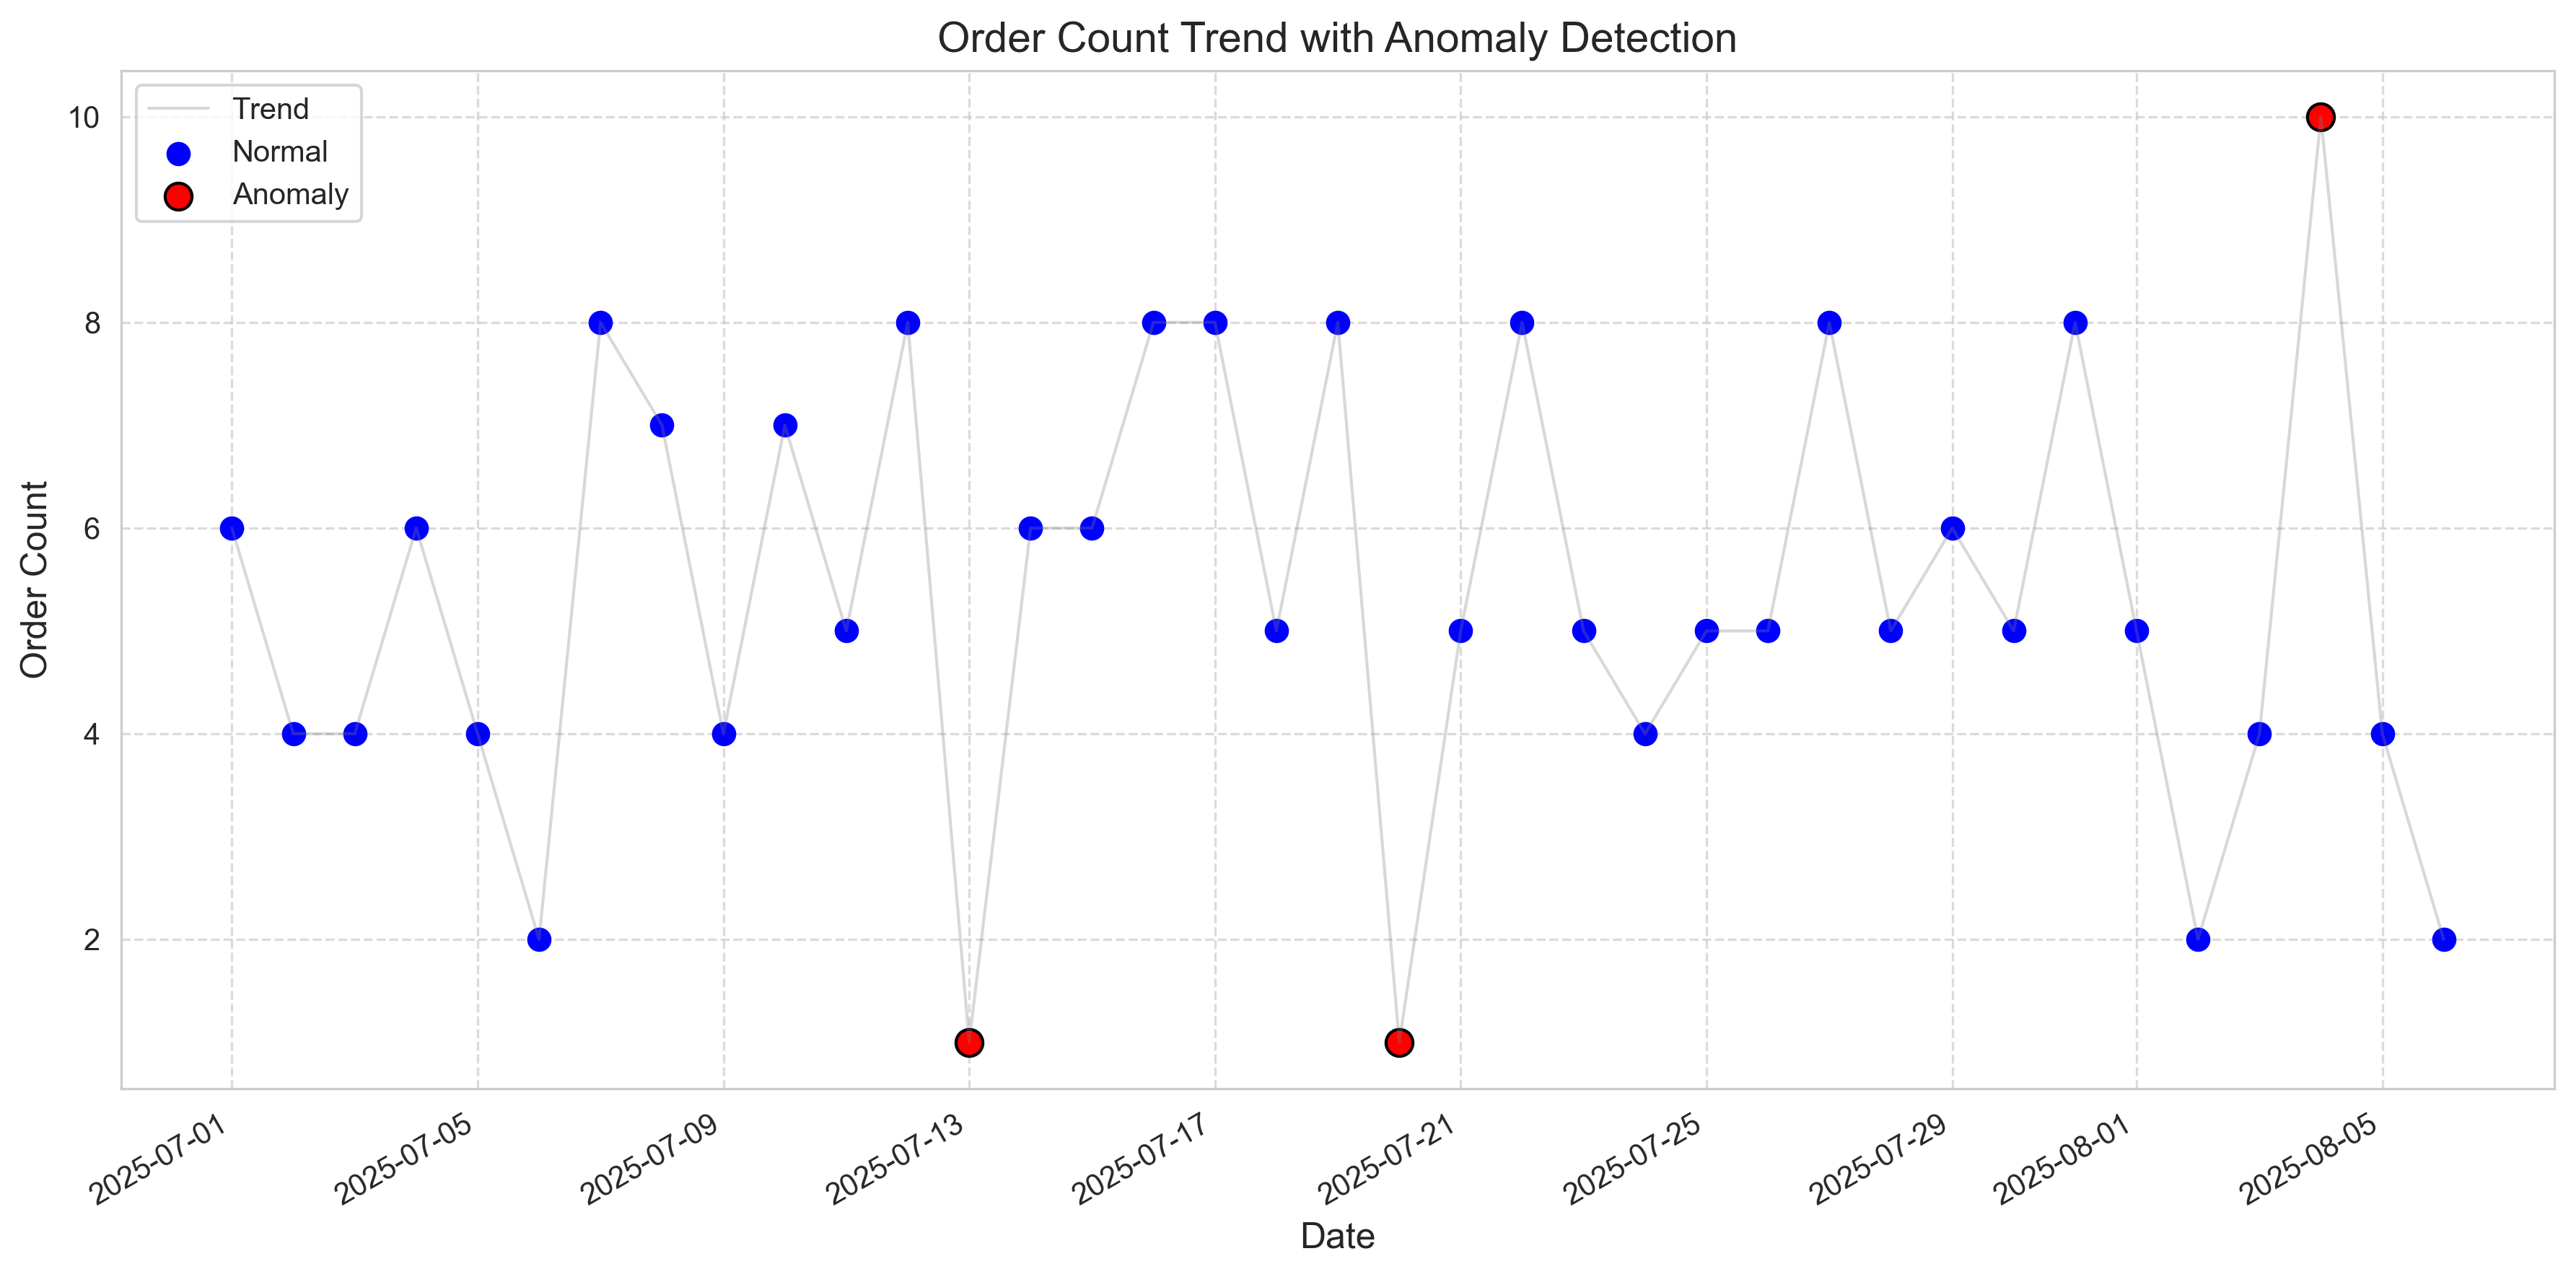

In [10]:
# Calculate anomaly scores and mark anomalies
df['scores'] = model.decision_function(df[['单数']])
df['anomaly'] = model.predict(df[['单数']])

# Create the plot
plt.figure(figsize=(12, 6), dpi=300)  # 方法1：创建时设置DPI

# Separate normal and anomaly points
normal = df[df['anomaly'] == 1]
anomaly = df[df['anomaly'] == -1]

# Plot connecting lines first (all points)
plt.plot(df['日期'], df['单数'], color='gray', linestyle='-', linewidth=1, alpha=0.3, label='Trend')

# Plot normal points
plt.scatter(normal['日期'], normal['单数'], color='blue', s=50, label='Normal')

# Plot anomaly points
plt.scatter(anomaly['日期'], anomaly['单数'], color='red', s=80, edgecolor='black', linewidth=1, label='Anomaly')

# Customize the plot
plt.title('Order Count Trend with Anomaly Detection', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Order Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Improve date formatting on x-axis
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()